# Titanic Dataset

In [518]:
#Imports

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [520]:
#Importing And Checking Out Data

In [521]:
data = pd.read_csv('data.csv')

In [522]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [524]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [525]:
#Data Cleaning

# Step 1 : As we can see from the info that a lot of information from the Cabin column is missing, so we are dropping the column
# Step 2 : For the missing data from Age column, we are replacing them with the mean of the Age column
# Step 3 : After this, we are dropping any row with one or more than one missing values

In [526]:
data.drop('Cabin',axis=1,inplace=True)    
data['Age'].fillna(data['Age'].mean(),inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [527]:
data.head()   #Checking out data one more time

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Data Visualisation

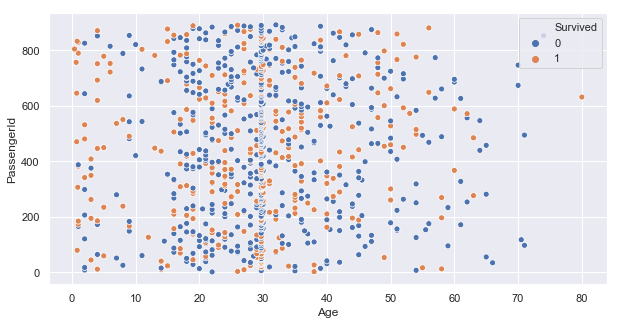

In [529]:
# Here we have plotted the passengers based on their Age.

sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='Age',y='PassengerId',data=data,hue='Survived')

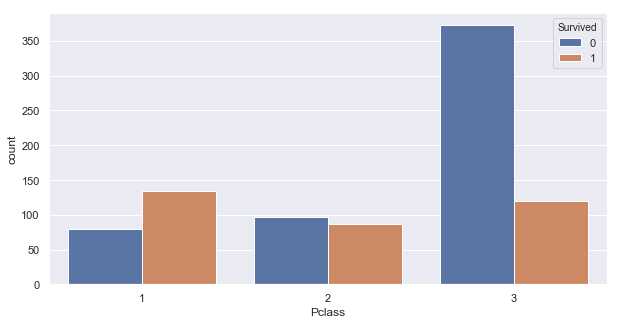

In [530]:
# We have plotted the count of passengers that survived based on the Passenger Class they were travelling in. It is clear that
# passengers who were travlling in 1st class had better survival rate than those of 2nd and 3rd classes. So the passengers who
# were on a higher tier in the society were given priority during evacuation.

sns.countplot(x=data['Pclass'],data=data,hue='Survived')

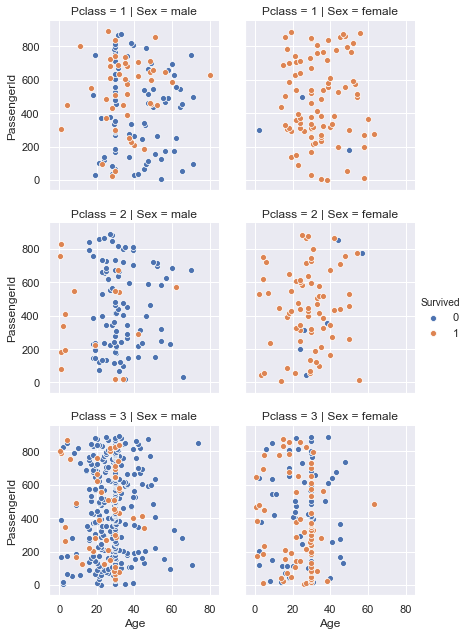

In [531]:
# We have plotted the facetgrid based on Passenger Class,Sex and Age .  We see that women had a higher survival rate than men 
# which shows that women were given priority over men while evacuation. Also higher number of people were travelling in 3rd 
# class and fewer were travelling in 1st and 2nd classes ( which were meant for richer people ). It is again evident that
# the survival chances of 1st and 2nd classes were better than that of 3rd class. 


grid = sns.FacetGrid(data,row='Pclass',col='Sex',hue='Survived')
grid.map(sns.scatterplot,'Age','PassengerId')
grid.add_legend()

In [503]:
# Imports for training and testing the model

In [504]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [505]:
# Data Preprocessing

In [506]:
# The columns Sex and Embarked are categorical columns with 2 and 3 unique values respectivley. We are using Label Encoder to 
# convert the string values to numeric values so that they can be fed to the machine learning model.

In [532]:
sexEncoder = LabelEncoder()
data['Sex'] = sexEncoder.fit_transform(data['Sex'])

In [533]:
embarkedEncoder = LabelEncoder()
data['Embarked'] = embarkedEncoder.fit_transform(data['Embarked'])

In [509]:
# We are dropping the Ticket and Name column because they have least contribution to the prediction of survival.

In [534]:
data.drop(['Ticket','Name'],axis=1,inplace=True)

In [ ]:
# Splitting the data into training and testing data

In [535]:
X = data.drop('Survived',axis=1)
y = data['Survived'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [540]:
# Making an instance of Logistic Regression Model.

In [539]:
regressionModel = LogisticRegression()

In [541]:
# Trainig the instance of the model

In [542]:
regressionModel.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [543]:
# Predicting Results

In [544]:
predictions = regressionModel.predict(X_test)

In [ ]:
#Checking the accuracy of the model

In [462]:
from sklearn.metrics import classification_report,accuracy_score

In [463]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       173
           1       0.70      0.74      0.72        94

   micro avg       0.80      0.80      0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.80      0.80       267



In [464]:
print(round(accuracy_score(predictions,y_test)*100,2))

79.78


In [ ]:
# We have achieved almost 80 percent accuracy. Initially the accuracy we acheived was 65 percent. With a little bit of feature
# engineering , like filling empty values of Age column with the mean and some other small changes , the accuracy increased by 
# 15 percent.